# Comparison of Internet Usage Datasets (2005-2024)

Datasets:
1. Dataworld_bank
2. Kaggle
Purpose: Verify the similarity of global internet usage data across sources for 2005-2024

## 1. Imports and configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuration
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

# Chemins des fichiers - CORRECTION DU PATH (depuis src/internet_analysis/)
base_path = Path('../../data/usage')
file1 = base_path / 'dataworld_bank_dataset.csv'
file2 = base_path / 'kaggle_dataset.csv'

print(f"Fichier 1 (World Bank): {file1.exists()} - {file1}")
print(f"Fichier 2 (Kaggle): {file2.exists()} - {file2}")

Fichier 1 (World Bank): True - ..\..\data\usage\dataworld_bank_dataset.csv
Fichier 2 (Kaggle): True - ..\..\data\usage\kaggle_dataset.csv


## 2. Loading and exploring the data

In [2]:
# Load the World Bank file (skip metadata rows)
df1 = pd.read_csv(file1, skiprows=4)
print("Dataset 1 (World Bank - IT.NET.USER.ZS):")
print(f"Shape: {df1.shape}")
print(f"\nColumns: {df1.columns.tolist()[:10]}...")
print(f"\nFirst rows:")
print(df1.head())

Dataset 1 (World Bank - IT.NET.USER.ZS):
Shape: (266, 70)

Columns: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965']...

First rows:
                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                     Indicator Name  Indicator Code  1960  \
0  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
1  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
2  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
3  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
4  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   

   1961  1962  1963  1964  1965  ...     2016   2017 

In [3]:
# Load the second file (Kaggle/Statistica style)
df2 = pd.read_csv(file2)
print("Dataset 2 (Kaggle/Statistica):")
print(f"Shape: {df2.shape}")
print(f"\nColumns: {df2.columns.tolist()}")
print(f"\nFirst rows:")
print(df2.head())

Dataset 2 (Kaggle/Statistica):
Shape: (217, 26)

Columns: ['Country Name', 'Country Code', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

First rows:
     Country Name Country Code      2000        2001       2002       2003  \
0     Afghanistan          AFG        ..  0.00472257  0.0045614  0.0878913   
1         Albania          ALB  0.114097    0.325798   0.390081     0.9719   
2         Algeria          DZA  0.491706    0.646114    1.59164    2.19536   
3  American Samoa          ASM        ..          ..         ..         ..   
4         Andorra          AND   10.5388          ..    11.2605    13.5464   

       2004     2005     2006     2007  ...  2014  2015     2016     2017  \
0  0.105809  1.22415  2.10712      1.9  ...     7  8.26       11     13.5   
1   2.42039  6.04389  9.60999  15.0361  ...  54.3  56.9     59.6     62.4   
2   

## 3. Comparing countries between Dataset 1 and Dataset 2

In [4]:
# Prepare for country-by-country comparison
print("="*70)
print("COUNTRY-BY-COUNTRY COMPARISON - Dataset 1 vs Dataset 2")
print("="*70)


print(f"\n📊 Dataset 1 (World Bank):")
print(f"   Number of countries: {len(df1)}")
print(f"   Unique countries: {df1['Country Name'].nunique()}")

print(f"\n📊 Dataset 2 (Kaggle):")
print(f"   Number of countries: {len(df2)}")
print(f"   Unique countries: {df2['Country Name'].nunique()}")

# Find common country codes
codes_df1 = set(df1['Country Code'].dropna().unique())
codes_df2 = set(df2['Country Code'].dropna().unique())
codes_communs = sorted(list(codes_df1 & codes_df2))

print(f"\n🔄 Common country codes: {len(codes_communs)}")
print(f"   Example: {codes_communs[:10]}")

# Find common years (2005-2024)
years_common = [str(year) for year in range(2005, 2025)]
years_available_df1 = [col for col in df1.columns if col in years_common]
years_available_df2 = [col for col in df2.columns if col in years_common]

print(f"\n📅 Available years:")
print(f"   Dataset 1: {len(years_available_df1)} years ({years_available_df1[0]}-{years_available_df1[-1]})")
print(f"   Dataset 2: {len(years_available_df2)} years ({years_available_df2[0]}-{years_available_df2[-1]})")

COUNTRY-BY-COUNTRY COMPARISON - Dataset 1 vs Dataset 2

📊 Dataset 1 (World Bank):
   Number of countries: 266
   Unique countries: 266

📊 Dataset 2 (Kaggle):
   Number of countries: 217
   Unique countries: 217

🔄 Common country codes: 217
   Example: ['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG']

📅 Available years:
   Dataset 1: 20 years (2005-2024)
   Dataset 2: 19 years (2005-2023)


In [5]:
# Country-level comparison function
def compare_countries_between_datasets(df1, df2, country_code, years_range=None):
    """
    Compare the values for a specific country between two datasets
    
    Parameters:
    -----------
    df1 : pd.DataFrame
        Dataset 1 (World Bank format)
    df2 : pd.DataFrame
        Dataset 2 (kaggle_internet_usage format)
    country_code : str
        Country code (e.g., 'FRA' for France)
    years_range : list
        List of years to compare (e.g., ['2005','2010','2015','2020','2024'])
        If None, use all common years
    
    Returns:
    --------
    pd.DataFrame
        Comparison DataFrame with columns: Year, Dataset1, Dataset2, Difference, Difference%
    """
    
    # Determine common years
    years_common = [str(year) for year in range(2005, 2025)]
    years_available_df1 = [col for col in df1.columns if col in years_common]
    years_available_df2 = [col for col in df2.columns if col in years_common]
    years_to_use = sorted(list(set(years_available_df1) & set(years_available_df2)))
    
    if years_range:
        years_to_use = [y for y in years_to_use if y in years_range]
    
    # Extract country rows
    country_df1 = df1[df1['Country Code'] == country_code]
    country_df2 = df2[df2['Country Code'] == country_code]
    
    if len(country_df1) == 0 or len(country_df2) == 0:
        return None, f"❌ Country '{country_code}' not found in one of the datasets"
    
    country_name_1 = country_df1['Country Name'].iloc[0]
    country_name_2 = country_df2['Country Name'].iloc[0]
    
    # Build comparison rows
    comparison_data = []
    for year in years_to_use:
        val1 = pd.to_numeric(country_df1[year].iloc[0], errors='coerce')
        val2 = pd.to_numeric(country_df2[year].iloc[0], errors='coerce')
        
        if pd.notna(val1) and pd.notna(val2):
            diff = val1 - val2
            diff_pct = (diff / val2 * 100) if val2 != 0 else 0
            
            comparison_data.append({
                'Year': year,
                'Dataset1': val1,
                'Dataset2': val2,
                'Difference': diff,
                'Difference%': diff_pct
            })
    
    if not comparison_data:
        return None, f"⚠️ No common data for '{country_code}' in years {years_to_use}"
    
    result_df = pd.DataFrame(comparison_data)
    return result_df, f"✓ Pays: {country_name_1} / {country_name_2}"

# Test: Comparer la France
print("\n" + "="*70)
print("EXEMPLE: Comparaison pour la France (FRA)")
print("="*70)

comparison_fra, message_fra = compare_countries_between_datasets(df1, df2, 'TJK')
print(f"\n{message_fra}")

if comparison_fra is not None:
    print("\nDonnées de comparaison:")
    print(comparison_fra.to_string(index=False))
    print(f"\nRésumé:")
    print(f"  Différence moyenne: {comparison_fra['Difference%'].mean():.2f}%")
    print(f"  Écart maximum: {comparison_fra['Difference%'].max():.2f}%")
    print(f"  Écart minimum: {comparison_fra['Difference%'].min():.2f}%")



EXEMPLE: Comparaison pour la France (FRA)

✓ Pays: Tajikistan / Tajikistan

Données de comparaison:
Year  Dataset1  Dataset2  Difference  Difference%
2005   0.29869   0.29869      0.0000     0.000000
2006   3.77241   3.77241      0.0000     0.000000
2007   7.19762   7.19762      0.0000     0.000000
2008   8.78000   8.78000      0.0000     0.000000
2009  10.07000  10.07000      0.0000     0.000000
2010  11.55000  11.55000      0.0000     0.000000
2011  13.03000  13.03000      0.0000     0.000000
2012  14.51000  14.51000      0.0000     0.000000
2013  16.00000  16.00000      0.0000     0.000000
2014  17.49000  17.49000      0.0000     0.000000
2015  18.98000  18.98000      0.0000     0.000000
2016  20.47000  20.47000      0.0000     0.000000
2017  21.96000  21.96000      0.0000     0.000000
2020  27.54410  27.54410      0.0000     0.000000
2021  49.84090  28.34000     21.5009    75.867678
2022  53.10780  36.08720     17.0206    47.165200

Résumé:
  Différence moyenne: 7.69%
  Écart maxi

In [6]:
# Full comparative analysis across all countries
print("\n" + "="*70)
print("COMPARATIVE ANALYSIS - ALL COUNTRIES")
print("="*70)

# Build global analysis
years_common = [str(year) for year in range(2005, 2025)]
years_available_df1 = [col for col in df1.columns if col in years_common]
years_available_df2 = [col for col in df2.columns if col in years_common]
years_to_use = sorted(list(set(years_available_df1) & set(years_available_df2)))

print(f"\nYears used for analysis: {years_to_use}")

# Common country codes
codes_df1 = set(df1['Country Code'].dropna().unique())
codes_df2 = set(df2['Country Code'].dropna().unique())
codes_communs = sorted(list(codes_df1 & codes_df2))

# Compute diffs for all countries and years
all_comparisons = []
country_stats = {}

for code in codes_communs:
    comparison_result, _ = compare_countries_between_datasets(df1, df2, code, years_range=years_to_use)
    
    if comparison_result is not None:
        all_comparisons.append(comparison_result)
        
        # Compute stats for this country
        mean_diff_pct = comparison_result['Difference%'].mean()
        max_diff_pct = comparison_result['Difference%'].abs().max()
        
        country_name = df1[df1['Country Code'] == code]['Country Name'].iloc[0]
        country_stats[code] = {
            'Country Name': country_name,
            'Mean Diff %': mean_diff_pct,
            'Max Diff %': max_diff_pct,
            'Data Points': len(comparison_result)
        }

# Create summary DataFrame
summary_df = pd.DataFrame(country_stats).T
summary_df = summary_df.sort_values('Mean Diff %', ascending=False)

print(f"\n✓ Analysis completed for {len(summary_df)} countries")
print(f"\n📊 COUNTRIES WITH LARGEST DIFFERENCES:")
print(summary_df.head(15).to_string())

print(f"\n📊 COUNTRIES WITH SMALLEST DIFFERENCES:")
print(summary_df.tail(15).to_string())

print(f"\n📈 GLOBAL STATISTICS:")
print(f"  Mean difference (all countries/years): {summary_df['Mean Diff %'].mean():.2f}%")
print(f"  Std dev: {summary_df['Mean Diff %'].std():.2f}%")
print(f"  Median difference: {summary_df['Mean Diff %'].median():.2f}%")
print(f"  Max observed: {summary_df['Max Diff %'].max():.2f}%")


COMPARATIVE ANALYSIS - ALL COUNTRIES

Years used for analysis: ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

✓ Analysis completed for 209 countries

📊 COUNTRIES WITH LARGEST DIFFERENCES:
              Country Name Mean Diff % Max Diff % Data Points
TJK             Tajikistan    7.689555  75.867678          16
NER                  Niger    4.399093  37.558009          17
BLZ                 Belize    2.514812   12.85003          18
MDA                Moldova    2.442758  23.183745          18
ZWE               Zimbabwe    1.701731  16.352441          18
MLI                   Mali    1.678288   11.87391          18
COD       Congo, Dem. Rep.    1.443354   9.090268          18
BWA               Botswana    1.260068  15.562204          18
TCD                   Chad    1.209443   19.28637          18
COM                Comoros    1.135868   12.23347          16
STP  Sao Tome and Prin

In [7]:
# DIAGNOSTIC: Why are 8 countries missing? (217 common codes vs 209 analyzed)
print("\n" + "="*70)
print("DIAGNOSTIC: Missing countries analysis")
print("="*70)

# Find which codes have NO comparison data
missing_countries = []
countries_with_data = set(country_stats.keys())

print(f"\nTotal common country codes: {len(codes_communs)}")
print(f"Countries with analysis data: {len(countries_with_data)}")
print(f"Missing countries: {len(codes_communs) - len(countries_with_data)}")

for code in codes_communs:
    if code not in countries_with_data:
        country_name_1 = df1[df1['Country Code'] == code]['Country Name'].iloc[0] if code in df1['Country Code'].values else "Not in Dataset 1"
        country_name_2 = df2[df2['Country Code'] == code]['Country Name'].iloc[0] if code in df2['Country Code'].values else "Not in Dataset 2"
        missing_countries.append((code, country_name_1, country_name_2))

if missing_countries:
    print(f"\n❌ COUNTRIES WITH NO COMMON DATA ({len(missing_countries)}):")
    print("-" * 70)
    for code, name1, name2 in missing_countries:
        print(f"  {code}: DS1='{name1}' | DS2='{name2}'")
        
        # Check data availability for this country
        country_df1 = df1[df1['Country Code'] == code]
        country_df2 = df2[df2['Country Code'] == code]
        
        if len(country_df1) > 0:
            vals1 = country_df1[years_to_use].dropna(axis=1)
            print(f"     → Dataset 1: {len(vals1.columns)} valid years out of {len(years_to_use)}")
        if len(country_df2) > 0:
            vals2 = country_df2[years_to_use].dropna(axis=1)
            print(f"     → Dataset 2: {len(vals2.columns)} valid years out of {len(years_to_use)}")
else:
    print("\n✓ All common countries have analysis data!")


DIAGNOSTIC: Missing countries analysis

Total common country codes: 217
Countries with analysis data: 209
Missing countries: 8

❌ COUNTRIES WITH NO COMMON DATA (8):
----------------------------------------------------------------------
  ASM: DS1='American Samoa' | DS2='American Samoa'
     → Dataset 1: 0 valid years out of 19
     → Dataset 2: 19 valid years out of 19
  CHI: DS1='Channel Islands' | DS2='Channel Islands'
     → Dataset 1: 0 valid years out of 19
     → Dataset 2: 19 valid years out of 19
  IMN: DS1='Isle of Man' | DS2='Isle of Man'
     → Dataset 1: 0 valid years out of 19
     → Dataset 2: 19 valid years out of 19
  MAF: DS1='St. Martin (French part)' | DS2='St. Martin (French part)'
     → Dataset 1: 0 valid years out of 19
     → Dataset 2: 19 valid years out of 19
  MNP: DS1='Northern Mariana Islands' | DS2='Northern Mariana Islands'
     → Dataset 1: 0 valid years out of 19
     → Dataset 2: 19 valid years out of 19
  PLW: DS1='Palau' | DS2='Palau'
     → Dataset


VISUALIZATIONS - COUNTRY COMPARISON


C:\Users\jbertholat\AppData\Local\Temp\ipykernel_4784\3394067022.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(box_data, labels=['Mean Diff', 'Max Gap'], patch_artist=True)


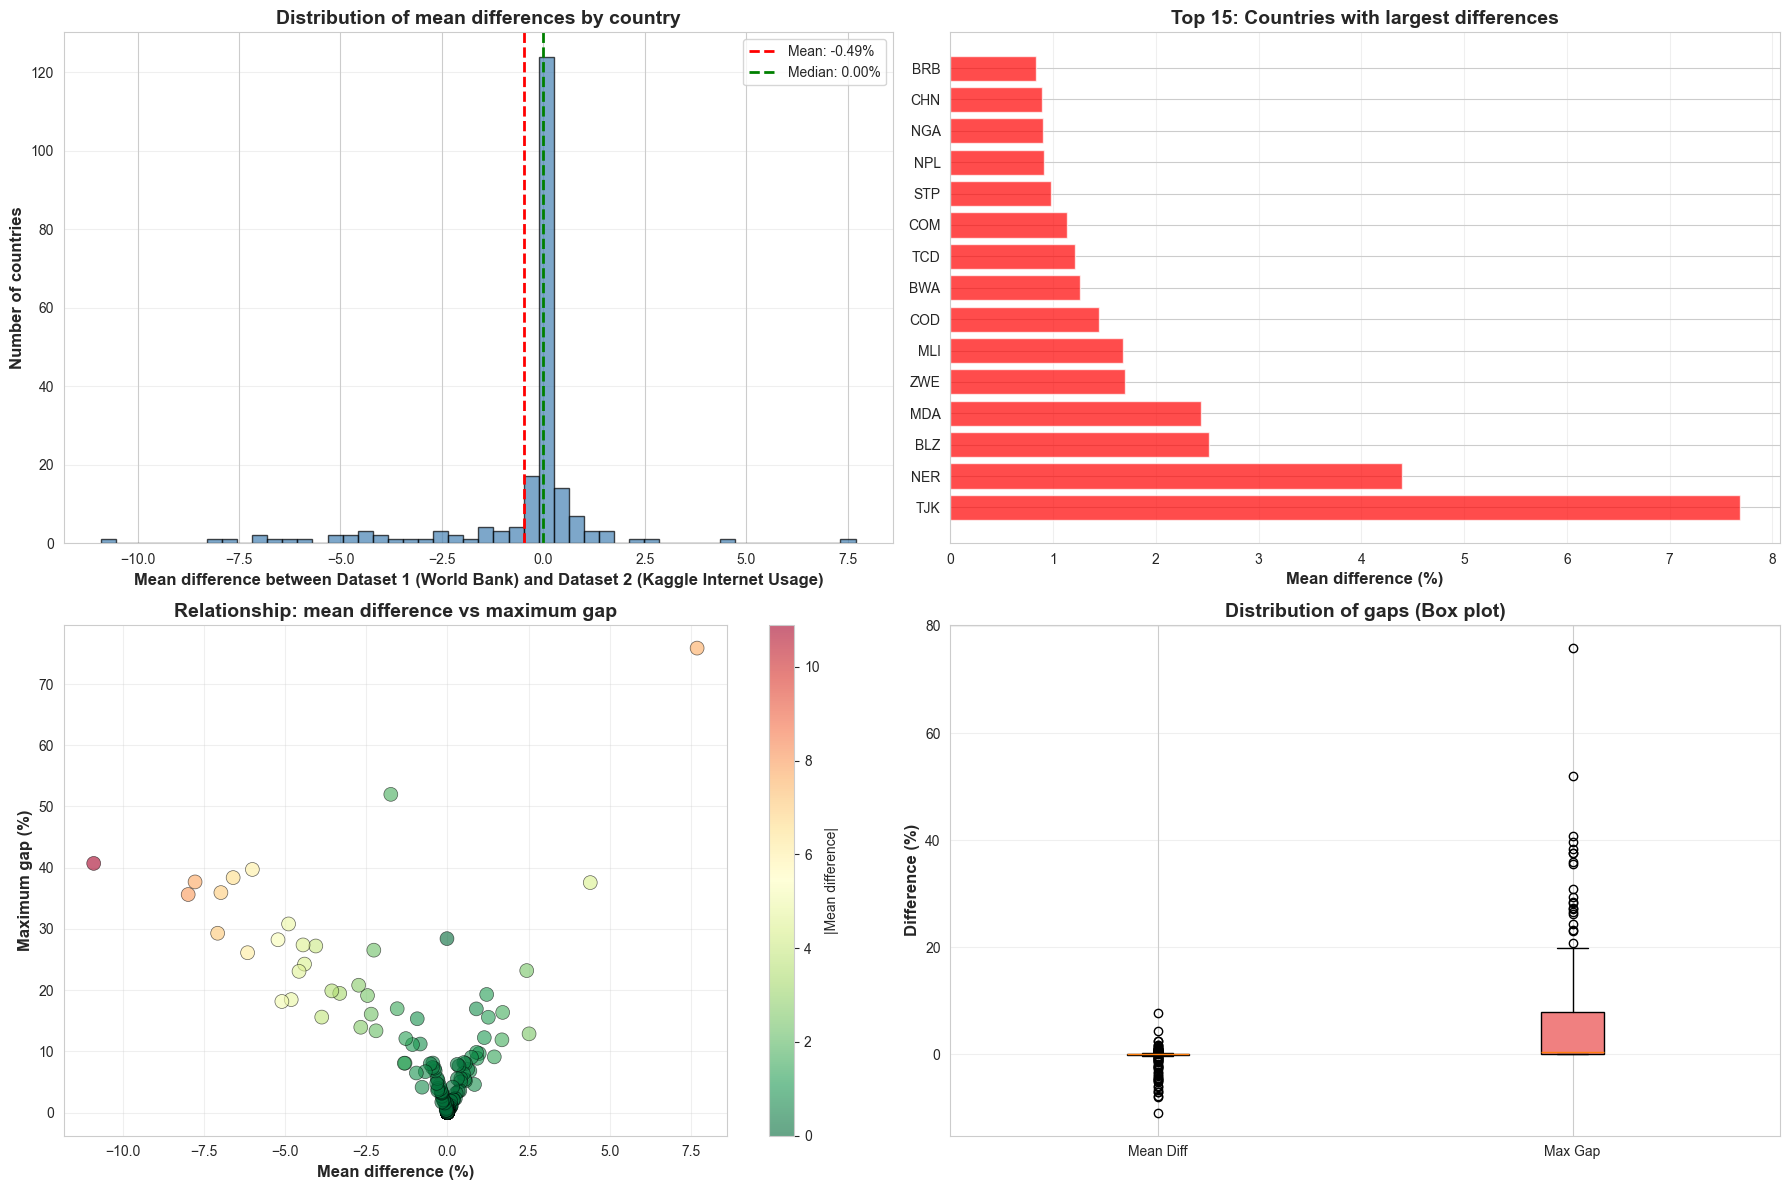


✓ Visualization saved: country_comparison_analysis.png


In [10]:
# Visualizations of country-level comparisons
print("\n" + "="*70)
print("VISUALIZATIONS - COUNTRY COMPARISON")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Distribution of mean differences
ax1 = axes[0, 0]
ax1.hist(summary_df['Mean Diff %'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(summary_df['Mean Diff %'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {summary_df['Mean Diff %'].mean():.2f}%")
ax1.axvline(summary_df['Mean Diff %'].median(), color='green', linestyle='--', linewidth=2, label=f"Median: {summary_df['Mean Diff %'].median():.2f}%")
ax1.set_xlabel('Mean difference between Dataset 1 (World Bank) and Dataset 2 (Kaggle Internet Usage)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of countries', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of mean differences by country', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

# 2. Countries with largest differences
ax2 = axes[0, 1]
top_15_diff = summary_df.head(15)
colors_diff = ['red' if x > 0 else 'green' for x in top_15_diff['Mean Diff %']]
ax2.barh(range(len(top_15_diff)), top_15_diff['Mean Diff %'], color=colors_diff, alpha=0.7)
ax2.set_yticks(range(len(top_15_diff)))
ax2.set_yticklabels(top_15_diff.index, fontsize=10)
ax2.set_xlabel('Mean difference (%)', fontsize=12, fontweight='bold')
ax2.set_title('Top 15: Countries with largest differences', fontsize=14, fontweight='bold')
ax2.axvline(0, color='black', linestyle='-', linewidth=0.5)
ax2.grid(True, alpha=0.3, axis='x')

# 3. Scatter: Mean Diff vs Max Diff
ax3 = axes[1, 0]
scatter = ax3.scatter(summary_df['Mean Diff %'], summary_df['Max Diff %'], 
                     s=100, alpha=0.6, c=abs(summary_df['Mean Diff %']), 
                     cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)
ax3.set_xlabel('Mean difference (%)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Maximum gap (%)', fontsize=12, fontweight='bold')
ax3.set_title('Relationship: mean difference vs maximum gap', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax3, label='|Mean difference|')

# 4. Box plot for gaps
ax4 = axes[1, 1]
box_data = [summary_df['Mean Diff %'], summary_df['Max Diff %']]
bp = ax4.boxplot(box_data, labels=['Mean Diff', 'Max Gap'], patch_artist=True)
for patch, color in zip(bp['boxes'], ['lightblue', 'lightcoral']):
    patch.set_facecolor(color)
ax4.set_ylabel('Difference (%)', fontsize=12, fontweight='bold')
ax4.set_title('Distribution of gaps (Box plot)', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('./outputs/country_comparison_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: country_comparison_analysis.png")

In [ ]:
# Export detailed results by country
print("\n" + "="*70)
print("DETAILED RESULTS EXPORT")
print("="*70)

# Create export file with all results
all_comparisons_df = pd.concat(all_comparisons, ignore_index=True)

# Add country code mapping
country_code_map = {}
for code in codes_communs:
    country_name = df1[df1['Country Code'] == code]['Country Name'].iloc[0]
    country_code_map[code] = country_name

print(f"\nDetailed results available for {len(all_comparisons)} countries")
print(f"Total data points: {len(all_comparisons_df)}")

# Export to CSV
export_filename = './outputs/country_comparison_details.csv'
all_comparisons_df.to_csv(export_filename, index=False)
print(f"\n✓ File exported: {export_filename}")

# Create summary file by country
summary_export_filename = './outputs/country_comparison_summary.csv'
summary_df.to_csv(summary_export_filename)
print(f"✓ File exported: {summary_export_filename}")

print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print(f"""
✅ Country-level comparison completed!

📊 RESULTS:
  • Countries compared: {len(summary_df)}
  • Total data points: {len(all_comparisons_df)}
  • Years analyzed: 2005-2024 ({len(years_to_use)} years)
  
📈 OBSERVED GAPS:
  • Global mean difference: {summary_df['Mean Diff %'].mean():.2f}%
  • Median: {summary_df['Mean Diff %'].median():.2f}%
  • Standard deviation: {summary_df['Mean Diff %'].std():.2f}%
  • Range: [{summary_df['Mean Diff %'].min():.2f}% to {summary_df['Mean Diff %'].max():.2f}%]
  
📁 GENERATED FILES:
  1. country_comparison_details.csv - Details by country and year
  2. country_comparison_summary.csv - Summary by country
  3. country_comparison_analysis.png - Visualizations

🔍 INTERPRETATION:
  • Positive value = Dataset 1 > Dataset 2
  • Negative value = Dataset 1 < Dataset 2
  • Large gaps may indicate different methodologies
  • Small gaps suggest compatible data
""")


DETAILED RESULTS EXPORT

Detailed results available for 209 countries
Total data points: 3581

✓ File exported: ./outputs/country_comparison_details.csv
✓ File exported: ./outputs/country_comparison_summary.csv

SUMMARY

✅ Country-level comparison completed!

📊 RESULTS:
  • Countries compared: 209
  • Total data points: 3581
  • Years analyzed: 2005-2024 (19 years)

📈 OBSERVED GAPS:
  • Global mean difference: -0.49%
  • Median: 0.00%
  • Standard deviation: 1.95%
  • Range: [-10.89% to 7.69%]

📁 GENERATED FILES:
  1. country_comparison_details.csv - Details by country and year
  2. country_comparison_summary.csv - Summary by country
  3. country_comparison_analysis.png - Visualizations

🔍 INTERPRETATION:
  • Positive value = Dataset 1 > Dataset 2
  • Negative value = Dataset 1 < Dataset 2
  • Large gaps may indicate different methodologies
  • Small gaps suggest compatible data

